# **Project3**

**By Mudassir Imam**

In [1]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00


In [2]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [3]:
!pip install -Uqq fastbook

In [4]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [5]:
import fastbook
from fastbook import *
import zipfile
from zipfile import ZipFile
import io
import gradio as gr

In [6]:
# Define the URL of the zip file on GitHub
github_zip_url = 'https://github.com/mimam786/DAV-6150/raw/main/Project3/Train_Data/Image_Datasets.zip'

# Send a GET request to download the zip file
response = requests.get(github_zip_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the contents of the zip file from the response content
    with ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
        # Define the directory where you want to extract the contents
        extraction_directory = ''
        # Extract the contents of the zip file into the specified directory
        zip_ref.extractall(extraction_directory)
    print('Extraction complete.')
else:
    print('Failed to download the zip file.')

Extraction complete.


In [7]:
# defining the path to our training images
path = Path('Image_Datasets')

tfms = aug_transforms(do_flip = True, flip_vert = True, mult=2.0)
dls= ImageDataLoaders.from_folder(path, train = "train",
                                   valid_pct=0.20,
                                   item_tfms=Resize(250),
                                   batch_tfms=tfms, bs = 64,
                                   num_workers = 8)

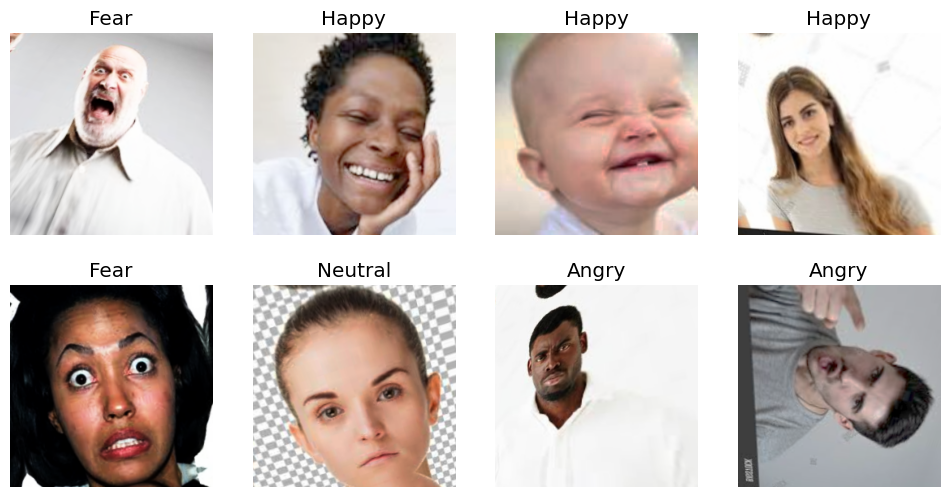

In [8]:
dls.train.show_batch(max_n=8, nrows=2)

In [9]:
model = vision_learner(dls, resnet50, metrics=accuracy)
model.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 71.0MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,3.360890,3.221436,0.041667,01:20


epoch,train_loss,valid_loss,accuracy,time
0,2.972714,2.706492,0.041667,01:34
1,2.830858,2.403961,0.125000,01:28
2,2.777605,2.110932,0.166667,01:33
3,2.729759,1.955552,0.208333,01:26
4,2.611619,1.911425,0.250000,01:26
5,2.512626,1.857004,0.333333,01:27
6,2.392880,1.864804,0.333333,01:27
7,2.323479,1.901961,0.416667,01:27
8,2.219055,1.895009,0.416667,01:30
9,2.113923,1.848149,0.458333,01:36


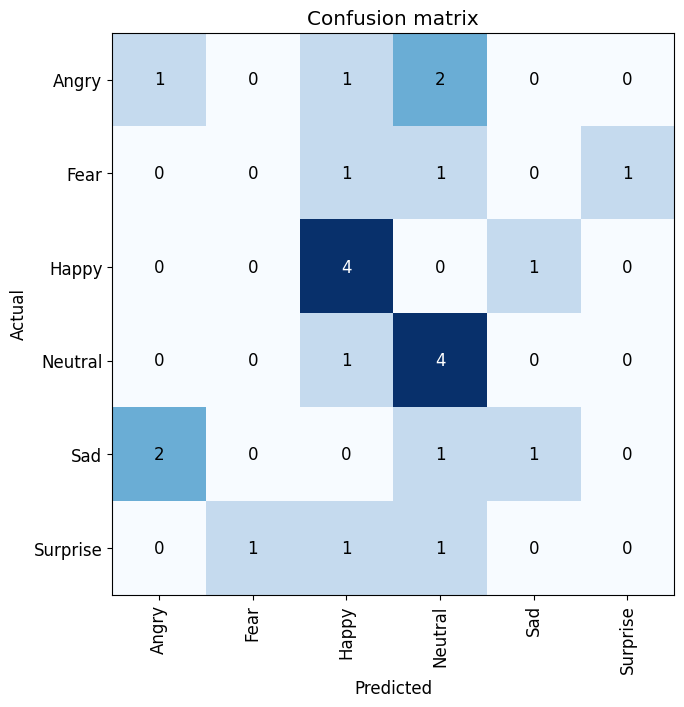

In [10]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(7,7))

In [11]:
model.unfreeze()
model.fine_tune(5, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.585602,1.608424,0.458333,01:07


epoch,train_loss,valid_loss,accuracy,time
0,0.757994,1.607454,0.416667,01:24
1,0.768165,1.619794,0.333333,01:28
2,0.889571,1.666856,0.375000,01:32
3,0.866494,1.695922,0.416667,01:25
4,0.863175,1.722938,0.375000,01:25


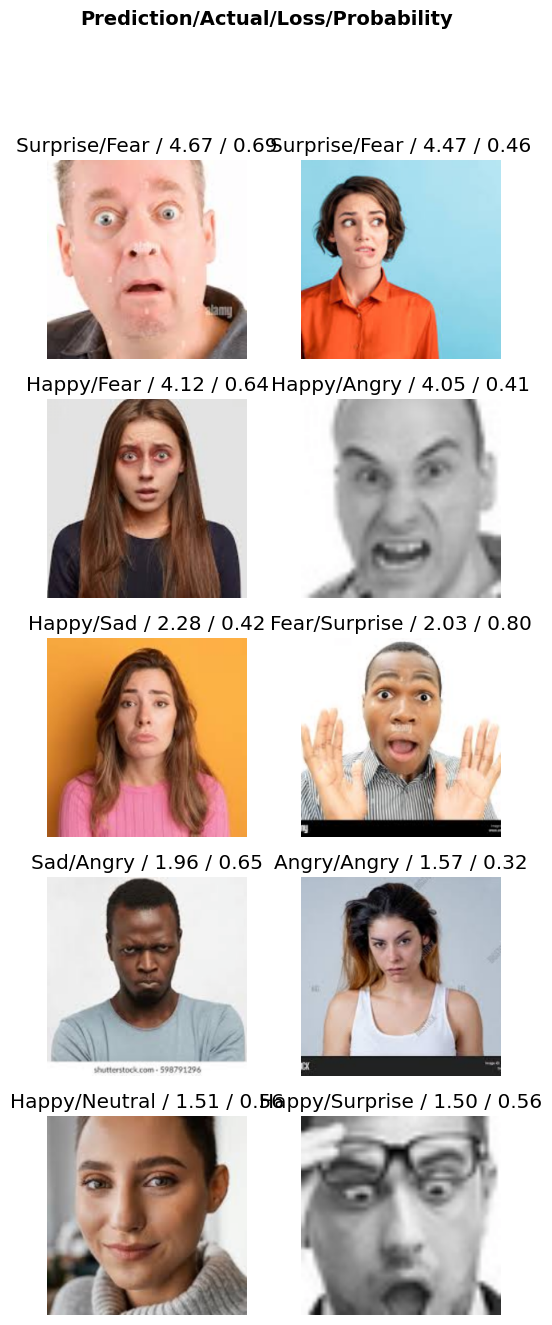

In [12]:
interp.plot_top_losses(10, nrows=5)

In [13]:
model.export('/tmp/exported_model.pkl')

In [14]:
model_inf = load_learner('/tmp/exported_model.pkl')

In [15]:
# Show classes in the model
model_inf.dls.vocab

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

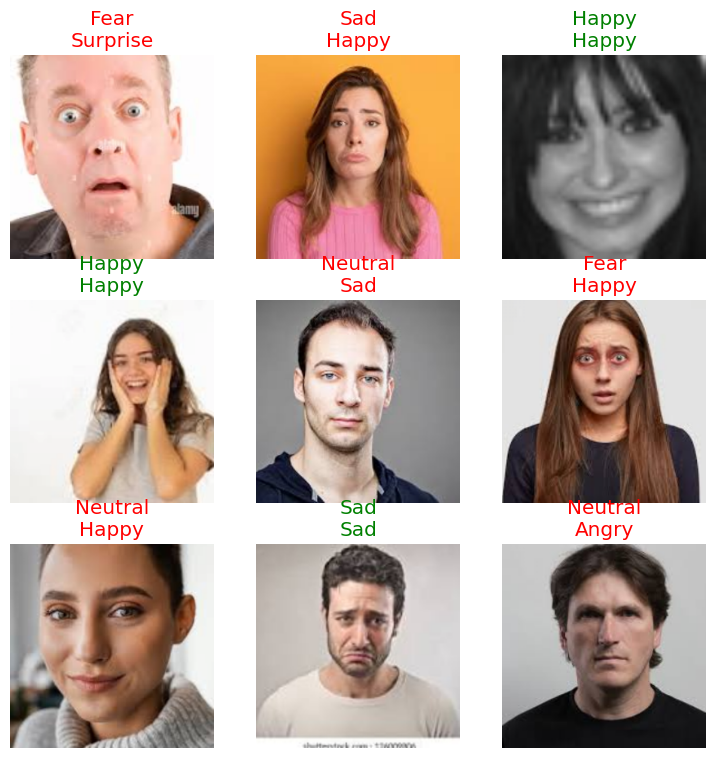

In [16]:
model.show_results()

In [18]:
# Load the exported model
model_inf = load_learner('/tmp/exported_model.pkl')

# Define function to predict emotion
def predict_emotion(image):
    # Convert image to PILImage
    image_pil = PILImage.create(image)

    # Make prediction
    pred, _, probs = model_inf.predict(image_pil)

    return pred

# Create Gradio interface
iface = gr.Interface(fn=predict_emotion, inputs="image", outputs="text",
                     title="Emotion Detection", description="Human Emotion Classifier")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://22f19ef0698009ba26.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
